# Lab: Word Similarity

## Introduction

Welcome to today's lab lecture. Our topic today is the exploration of word similarity and the application of Pointwise Mutual Information (PMI) in Natural Language Processing (NLP).

## Word Similarity

Words that are used in similar contexts are likely to have similar meanings. This forms the foundation of distributional semantics and is the basis for many word similarity measures.

Word similarity has many applications in NLP, including but not limited to:

- Information Retrieval: In search engines, we often want to retrieve documents that are relevant to a user's query, even if they don't share the exact same words. Understanding word similarity allows us to retrieve documents that contain words similar to those in the query.
- Text Summarization: When we're summarizing a text, we often need to identify the main themes or topics, which often involve words that are similar in meaning.
- Machine Translation: In translating a text from one language to another, we often need to find the best match for a given word in the target language, which often involves identifying words that are similar in meaning.

## Pointwise Mutual Information (PMI)

As we discussed in our earlier theory lecture, PMI is a measure that quantifies the discrepancy between the probability of two words co-occurring and the probabilities of the two words occurring independently. This is especially useful in identifying words that co-occur more often than we would expect by chance, which often corresponds to words that are semantically related.

## Lab Exercise: Calculating PMI

Today, we will apply PMI to a real-world corpus to identify semantically related words.

Here's an outline of the steps we'll take:

1. **Preprocessing**: We'll start by cleaning and tokenizing our corpus.

2. **Frequency Counting**: We'll count the frequency of each word, each context, and each word-context pair in the corpus.

3. **Probability Calculation**: We'll then calculate the probabilities $p(w)$, $p(c)$, and $p(w,c)$ based on these frequencies.

4. **PMI Calculation**: With these probabilities, we'll calculate the PMI for each word-context pair.

5. **Sorting and Visualization**: Finally, we'll sort the word-context pairs based on their PMI and visualize the results.

6. **Applying PPMI**: As an optional step, we'll also apply Positive Pointwise Mutual Information (PPMI), which sets all negative PMI values to 0.

7. **Evaluation**: We will evaluate our results by examining the word pairs with the highest PMI, which should ideally be pairs of words that are highly associated.

Please follow along as we go through each step, and feel free to ask questions if anything is unclear.

## Practice

Let's use Python for our example codes, and NLTK's Brown Corpus as our dataset:


In [1]:
import nltk
from collections import defaultdict
from math import log
import operator

# Download the corpus
nltk.download("brown")

# Load the corpus
from nltk.corpus import brown

# Preprocessing
sentences = brown.sents()
tokens = [[word.lower() for word in sent] for sent in sentences]

# Frequency counting
f_w = defaultdict(int)  # frequency of each word
f_c = defaultdict(int)  # frequency of each context
f_wc = defaultdict(int)  # frequency of each word-context pair
N = 0  # total number of word-context pairs

# Define the context window (change this value to adjust the window size)
window_size = 2

# Loop over sentences, and for each word, add its surrounding words to its context
for sentence in tokens:
    for i, word in enumerate(sentence):
        for j in range(
            max(0, i - window_size), min(len(sentence), i + window_size + 1)
        ):
            if i != j:  # exclude the word itself
                context_word = sentence[j]
                f_w[word] += 1
                f_c[context_word] += 1
                f_wc[(word, context_word)] += 1
                N += 1

# Probability calculation
p_w = {word: f / N for word, f in f_w.items()}  # probability of each word
p_c = {context: f / N for context, f in f_c.items()}  # probability of each context
p_wc = {
    (w, c): f / N for (w, c), f in f_wc.items()
}  # probability of each word-context pair

# PMI calculation
PMI = {(w, c): log(p_wc[(w, c)] / (p_w[w] * p_c[c])) for (w, c) in p_wc}

# Sorting and visualization
sorted_PMI = sorted(PMI.items(), key=operator.itemgetter(1), reverse=True)

# Print the top 10 word-context pairs by PMI
for i in range(10):
    print(sorted_PMI[i])

# Applying PPMI
PPMI = {wc: max(value, 0) for wc, value in PMI.items()}

# Print the top 10 word-context pairs by PPMI
sorted_PPMI = sorted(PPMI.items(), key=operator.itemgetter(1), reverse=True)
for i in range(10):
    print(sorted_PPMI[i])

[nltk_data] Downloading package brown to /home/yjlee/nltk_data...
[nltk_data]   Package brown is already up-to-date!


(('decries', 'joblessness'), 15.274446924376207)
(('joblessness', 'decries'), 15.274446924376207)
(('procaine', 'penicillin'), 13.888152563256316)
(('penicillin', 'procaine'), 13.888152563256316)
(('featherbed', 'reversal'), 13.665009011942105)
(('reversal', 'featherbed'), 13.665009011942105)
(('bingles', 'bobbles'), 13.48268745514815)
(('bobbles', 'bingles'), 13.48268745514815)
(('deane', 'beman'), 13.48268745514815)
(('beman', 'deane'), 13.48268745514815)
(('decries', 'joblessness'), 15.274446924376207)
(('joblessness', 'decries'), 15.274446924376207)
(('procaine', 'penicillin'), 13.888152563256316)
(('penicillin', 'procaine'), 13.888152563256316)
(('featherbed', 'reversal'), 13.665009011942105)
(('reversal', 'featherbed'), 13.665009011942105)
(('bingles', 'bobbles'), 13.48268745514815)
(('bobbles', 'bingles'), 13.48268745514815)
(('deane', 'beman'), 13.48268745514815)
(('beman', 'deane'), 13.48268745514815)


This script preprocesses the text, calculates frequencies and probabilities, computes PMI, applies PPMI, and prints out the top 10 word-context pairs by PMI and PPMI.

Keep in mind that these calculations can take a long time if your corpus is large. There are also more efficient ways to compute PMI and PPMI that use sparse matrix representations and matrix factorization methods.

### Visualization


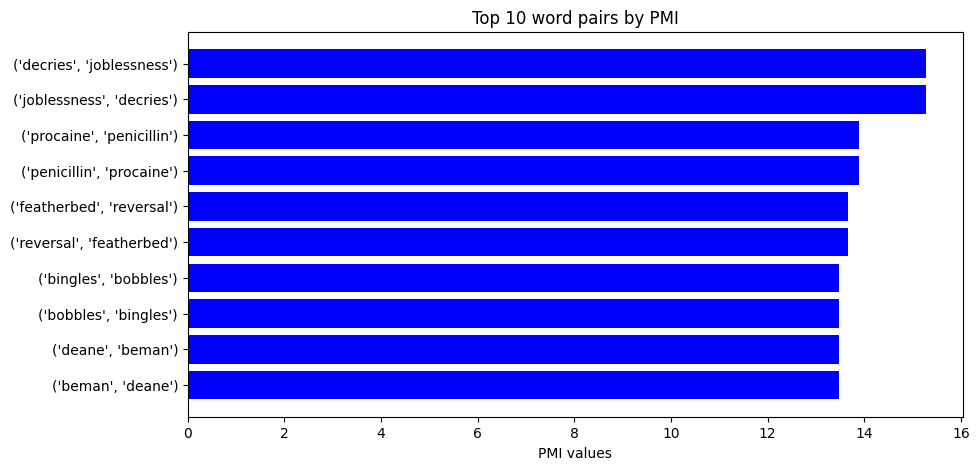

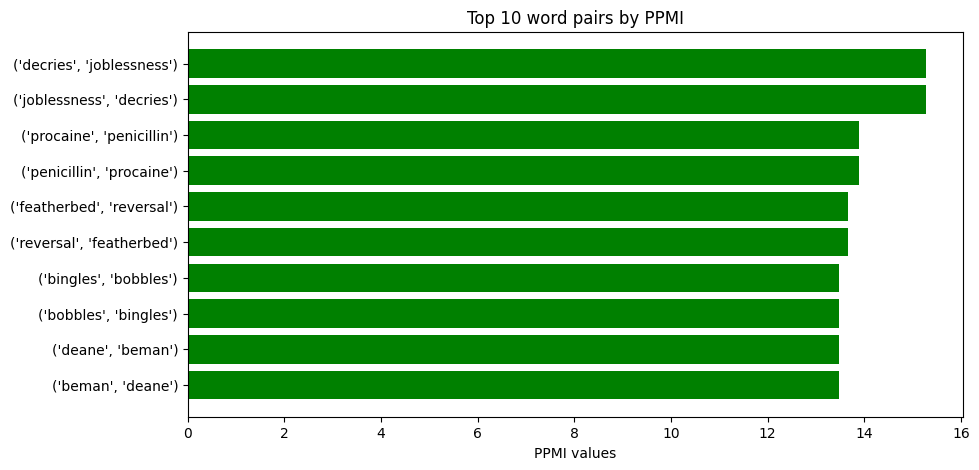

In [2]:
import matplotlib.pyplot as plt

# Get words and PMI/PPMI values
words_PMI = [str(pair[0]) for pair in sorted_PMI[:10]]
PMI_values = [pair[1] for pair in sorted_PMI[:10]]

words_PPMI = [str(pair[0]) for pair in sorted_PPMI[:10]]
PPMI_values = [pair[1] for pair in sorted_PPMI[:10]]

# Plot PMI values
plt.figure(figsize=(10, 5))
plt.barh(words_PMI, PMI_values, color="blue")
plt.xlabel("PMI values")
plt.title("Top 10 word pairs by PMI")
plt.gca().invert_yaxis()  # Invert axis for better visualization
plt.show()

# Plot PPMI values
plt.figure(figsize=(10, 5))
plt.barh(words_PPMI, PPMI_values, color="green")
plt.xlabel("PPMI values")
plt.title("Top 10 word pairs by PPMI")
plt.gca().invert_yaxis()  # Invert axis for better visualization
plt.show()

In this script, we first extract the word pairs and their corresponding PMI and PPMI values. Then, we create bar plots for both PMI and PPMI values. This provides a simple, effective visualization of the words in the corpus with the highest pointwise mutual information values. These are words that co-occur together more often than would be expected by chance, indicating a potentially strong semantic relationship.

> **Note**
>
> The `str()` function is used to convert the word pairs to strings so they can be properly displayed on the plots.

## Conclusion

By the end of this lab, you should have a good understanding of how PMI works and how to apply it in practice. You should also be familiar with the concept of word similarity and its role in NLP.
